# MATH7002 Advanced Statistical methods
## Worksheet 6

The following code fit an *Analysis of Covariance* to the crabs data from lectures. Note that because `lm` fits an *intercept* and *slope* for females, and the the differences in intercept and slope for males we have to compute the intercept and slope for males.

In [1]:
require(MASS)
require(mixtools)

Loading required package: MASS

Loading required package: mixtools

mixtools package, version 2.0.0.1, Released 2022-12-04
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772 and the Chan Zuckerberg Initiative: Essential Open Source Software for Science (Grant No. 2020-255193).




In [4]:
# Relationship between RE and CL, moreover, we need to consider the influence of sex 
# Now, sex is the confounder 
fit = lm(CL~sex*RW, data=crabs)

In [5]:
summary(fit)


Call:
lm(formula = CL ~ sex * RW, data = crabs)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7103 -0.7048 -0.0383  0.8923  3.6129 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.18379    0.62224  -1.902   0.0586 .  
sexM        -6.74774    0.93567  -7.212 1.18e-11 ***
RW           2.41297    0.04522  53.359  < 2e-16 ***
sexM:RW      0.98840    0.07305  13.531  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.233 on 196 degrees of freedom
Multiple R-squared:  0.9704,	Adjusted R-squared:   0.97 
F-statistic:  2145 on 3 and 196 DF,  p-value: < 2.2e-16


In [12]:
coef(fit)

(Intercept)        sexM          RW     sexM:RW 
 -1.1837924  -6.7477353   2.4129749   0.9884036

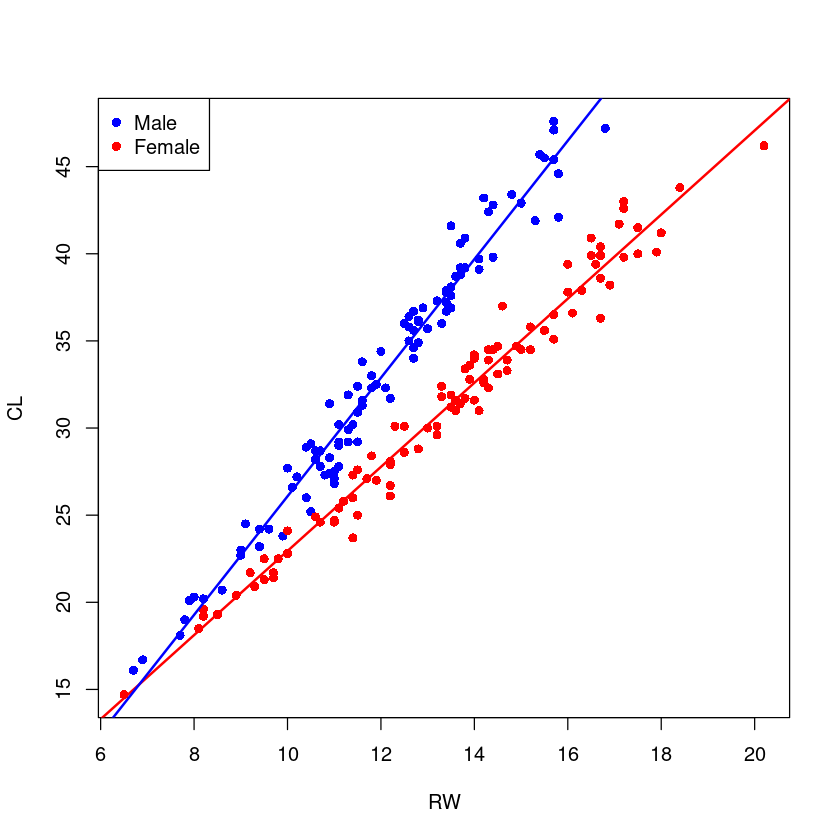

In [9]:
plot(CL~RW, data=crabs, col=ifelse(sex=="M", "blue", "red"), pch=16)
legend("topleft", pch=16, col=c("blue", "red"), legend = c("Male", "Female"))
cc = coef(fit)
abline(cc[1], cc[3], col="red", lwd=2)
abline(cc[1]+cc[2], cc[3]+cc[4], col="blue", lwd=2)

1. The `whiteside` data in the MASS library contains the gas consumption versus temperature for a number of (UK) homes. The homes are either insulated or not. Fit an analysis of covariance (as above) to this data. Ignoring the insulation status, fit a regression mixture model to the same data. Plot the results.

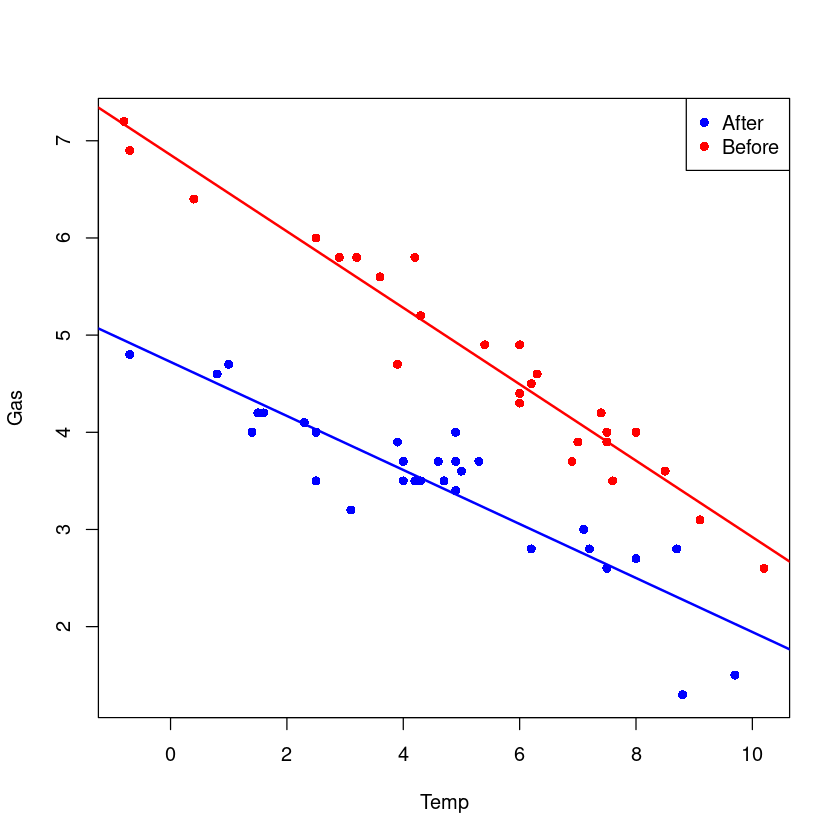

In [18]:
fit = lm(Gas~Insul*Temp, data = whiteside)
#summary(fit)
plot(Gas~Temp, data = whiteside, col = ifelse(Insul=="After", "blue", "red"), pch = 16)
legend("topright", pch = 16, col = c("blue", "red"), legend = c("After", "Before"))
cc = coef(fit)
abline(cc[1], cc[3], col = "red", lwd = 2)
abline(cc[1] + cc[2], cc[3] + cc[4], col = "blue", lwd = 2) 

In [22]:
summary(fit)


Call:
lm(formula = Gas ~ Insul * Temp, data = whiteside)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97802 -0.18011  0.03757  0.20930  0.63803 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.85383    0.13596  50.409  < 2e-16 ***
InsulAfter      -2.12998    0.18009 -11.827 2.32e-16 ***
Temp            -0.39324    0.02249 -17.487  < 2e-16 ***
InsulAfter:Temp  0.11530    0.03211   3.591 0.000731 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.323 on 52 degrees of freedom
Multiple R-squared:  0.9277,	Adjusted R-squared:  0.9235 
F-statistic: 222.3 on 3 and 52 DF,  p-value: < 2.2e-16


number of iterations= 14 


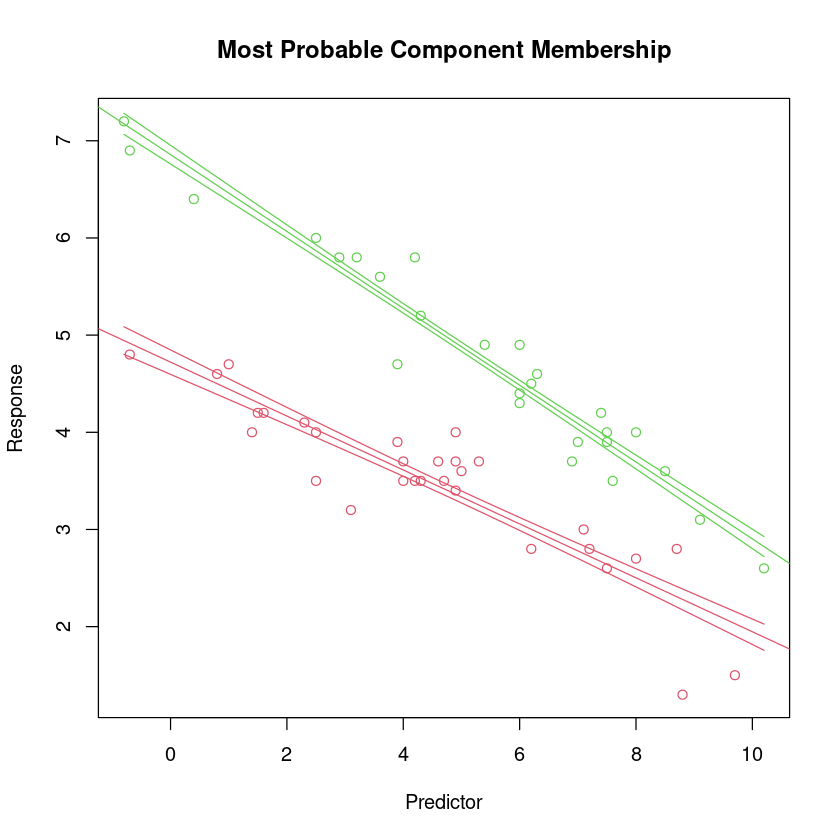

In [21]:
fit.mix = with(whiteside, regmixEM(Gas, Temp, arbvar = FALSE))
plot(fit.mix, whichplots = 2)

2. The Old Faithful data actually has waiting *and* eruption times. Plot the waiting and eruption times as a two dimensional plot. Fit 2 and 3 component mixtures to the 2-d data.

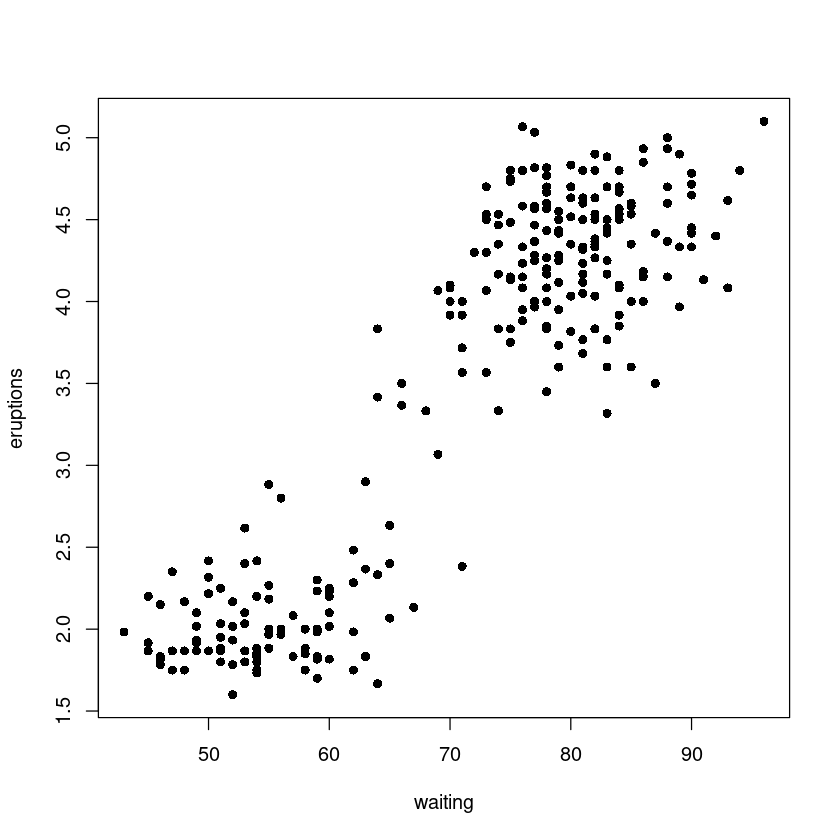

In [24]:
plot(eruptions~waiting, data = faithful, pch = 16)

In [35]:
faithful

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.700,88
8,3.600,85
9,1.950,51


In [36]:
m2 = mvnormalmixEM(faithful, k = 2)
summary(m2)

number of iterations= 10 
summary of mvnormalmixEM object:
          comp 1    comp 2
lambda  0.355873  0.644127
mu1     2.036389  4.289662
mu2    54.478517 79.968116
loglik at estimate:  -1130.264 


In [37]:
m2$sigma

0.06916774,0.4351683
0.43516832,33.6972868
0.1699683,0.9406081
0.9406081,36.0461979


3. In a previous worksheet we fit a 2-d kernel density estimate to Waiting times and subsequent waiting time. Fit 2 and 3 component 2-d mixtures to this data, and plot the results. Fit them several times an observe stability. 

In [38]:
Waiting = faithful$waiting

In [39]:
# Here we need to do some special operation 
# So we need to delect the first one and the last waiting time because of its physical meaning
n = length(Waiting)

In [42]:
# We want to skip the first one and the last one 
# Waiting[-1] 
# We want to skip the last one 
# Waiting[-n]
# We want to concatenate these two columns
X = cbind(Waiting[-1], Waiting[-n])

In [61]:
m3 = mvnormalmixEM(X, k = 2)

number of iterations= 32 


In [62]:
summary(m2)

summary of mvnormalmixEM object:
            comp 1    comp 2
lambda  0.00563334  0.994367
mu1    63.53948992 70.908672
mu2    70.70116614 70.886654
loglik at estimate:  -2136.033 


In [53]:
m3$sigma

29.211203,-9.487524
-9.487524,30.648651
29.962900,-7.025475
-7.025475,39.142021
172.66353,-22.64218
-22.64218,31.83161


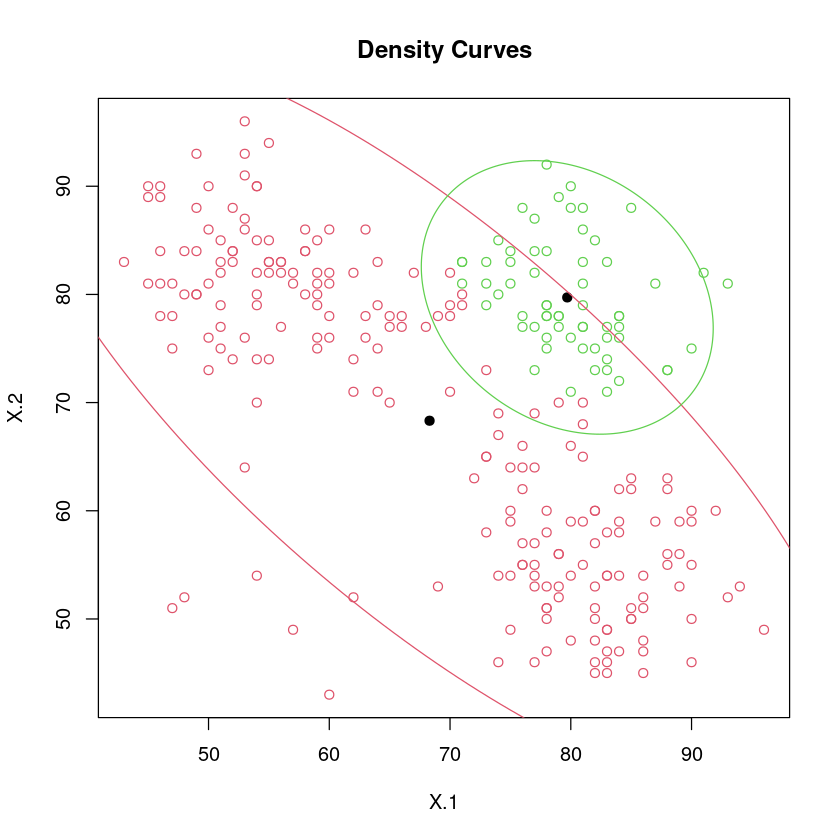

In [63]:
plot(m3, whichplots = 2)

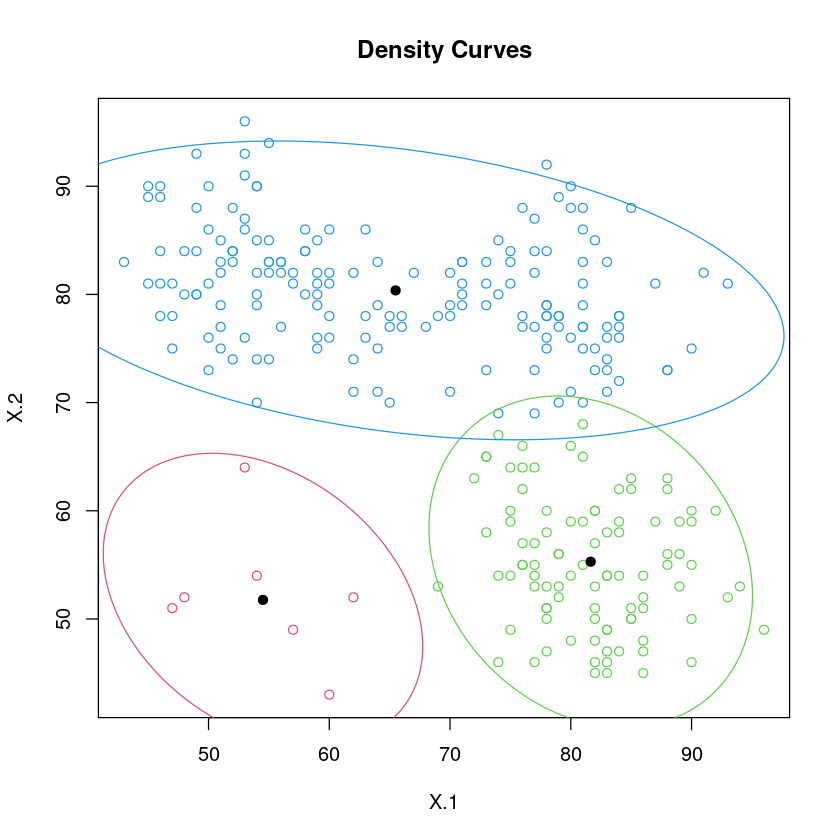

In [54]:
plot(m3, whichplots = 2)

4. Using a parametric bootstrap likelihood ratio test  (`boot.comp`) decide if the `ThreeMix.csv` is best modelled by 2, 3 or 4 one-dimensional component mixtures.

In [55]:
threeMix = read.csv("ThreeMix.csv")

number of iterations= 14 
number of iterations= 184 
number of iterations= 426 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 231 
number of iterations= 184 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 577 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 405 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
One of the variances is going to zero;  trying new starting values.
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 910 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CO

$p.values
[1] 0.00 0.00 0.25

$log.lik
$log.lik[[1]]
  [1]  5.6269198 10.8587485  0.7319617 11.9302867  7.5410764  3.5728717
  [7]  2.7547829  3.2312784  3.6511337  6.2401841  1.2826493  8.4136000
 [13]  3.2967024  5.6780030  0.1494681  6.0031986  2.5482654  2.3369724
 [19]  1.3574795  9.0529686  1.7526269  8.3626486 10.7449412  3.1714309
 [25]  2.0683164  1.9247696 11.4308455 18.9366584  4.7188458  8.7056953
 [31]  1.3068624  5.2891640 10.8132187  3.4173971  3.7116020  4.7045533
 [37]  1.8504142  3.6255180 10.3986158  6.9388637  4.2872186  5.0494386
 [43]  4.7026861 13.3373023  3.6711993  6.1907956  1.4950132  1.0498461
 [49]  2.1029885  4.3658630 13.4691689  8.3976922  4.2006005  5.1020982
 [55]  0.2113229  3.6305345  5.4338483  2.1434496  3.3087318  9.0775859
 [61]  3.1888590  4.6984351  4.4511874  2.0348624  2.7805647  7.2482681
 [67]  2.2384166  3.8283406  3.5495942  0.7904572 10.8224990  1.6904920
 [73]  0.8741329  1.9450365  6.3465395  5.1783981  6.1372411  8.7339576
 [79]  1.5492079  0.2037550  8.3411854  7.2577470  9.7772539  7.2224325
 [85]  4.1123771  8.1604982  4.8773186  3.2485919  2.5756847  2.8476821
 [91]  2.6437634  4.5880623 12.6862805  9.2622905 14.0947666  3.2273136
 [97]  1.2616186  7.5253323  1.0100833  4.6923582

$log.lik[[2]]
  [1] 2.329324e+00 1.563692e+01 2.472971e+00 5.152340e+00 7.908239e-01
  [6] 1.226548e+00 8.370051e+00 1.448171e+01 3.176776e+00 3.950511e+00
 [11] 1.937512e+00 1.457597e+00 5.273845e-01 1.877723e+00 3.097410e+00
 [16] 9.212313e-02 4.989082e+00 7.860408e-01 8.243460e-01 8.483384e-01
 [21] 4.310751e+00 3.192700e+00 1.398068e+00 7.966818e+00 5.381585e+00
 [26] 4.694495e+00 1.375399e-02 3.371108e+00 2.747095e+00 1.169125e+00
 [31] 5.843824e+00 2.534729e+00 1.671574e+00 4.648324e+00 6.538167e+00
 [36] 1.096841e+01 5.611359e+00 2.295199e-05 1.559834e+00 3.936545e+00
 [41] 2.374627e+00 3.861276e+00 3.487476e+00 9.336468e-01 2.062831e+00
 [46] 3.717490e+00 2.644637e+00 1.386541e+01 3.714542e+00 1.796624e+00
 [51] 8.104169e+00 5.697460e-01 2.825342e+00 4.776521e+00 6.301411e+00
 [56] 9.674498e-01 3.534751e+00 4.545045e+00 4.092059e+00 1.840327e+00
 [61] 7.220677e+00 3.671146e+00 1.116640e+00 6.391880e-01 3.859663e+00
 [66] 9.034910e-01 1.576768e-01 3.148009e+00 9.581489e-01 1.116926e+01
 [71] 5.049297e-01 2.487033e+00 4.984161e-01 9.205379e+00 1.762204e+00
 [76] 2.111859e+00 1.620845e+00 2.814496e+00 1.110323e-01 1.806434e+01
 [81] 1.061085e+00 1.078929e+01 2.731074e-01 5.827418e+00 8.089909e+00
 [86] 3.431454e+00 1.061043e+01 5.363789e-01 5.943052e+00 3.159775e+00
 [91] 2.914736e+00 2.377367e+00 4.752819e+00 1.495386e-01 2.743510e+00
 [96] 7.607235e+00 1.583769e+00 4.144748e+00 5.422644e+00 5.196987e+00

$log.lik[[3]]
  [1] 2.281844e+00 7.859655e-01 2.292251e+00 1.167601e+00 1.503258e-01
  [6] 1.366050e+00 5.934595e-01 7.756737e-01 1.641632e+02 1.834262e+00
 [11] 3.467707e+00 9.082475e-01 3.350523e+00 7.930574e+00 4.388348e+00
 [16] 4.474314e+00 1.295228e+02 5.086259e-01 2.834755e+00 8.026071e+00
 [21] 9.093167e-01 6.140227e+00 2.723940e+00 1.474042e+02 3.694952e-01
 [26] 3.656378e+00 6.894262e-01 2.609524e+00 1.499946e-01 6.190689e-01
 [31] 3.229542e+00 3.481037e-01 1.873330e+00 1.116316e+00 4.370651e-01
 [36] 2.496054e+00 4.524360e+00 5.335813e-01 2.090573e+00 1.363636e-01
 [41] 2.186334e+00 7.916522e-01 1.634930e+02 1.906208e+00 3.764736e-02
 [46] 5.706928e+00 1.462597e+02 1.553857e+02 7.328047e-04 1.640783e+02
 [51] 2.332674e-01 1.560155e+02 9.750641e+00 5.279177e+00 1.217665e+02
 [56] 3.796613e+00 7.244636e-01 4.558780e-01 7.045737e-01 4.162359e+00
 [61] 2.364210e+00 5.177548e+00 4.298024e+00 7.581943e-01 6.486433e+00
 [66] 5.086815e+00 2.819348e+00 4.016507e-01 1.773465e+02 4.104047e+00
 [71] 8.118400e+00 1.580858e+02 8.077369e+00 6.453118e+00 3.964023e-01
 [76] 4.104650e-01 7.366598e+00 1.485155e+02 1.439081e+02 2.152531e+00
 [81] 7.108278e+00 3.129321e-01 1.002875e+01 2.615759e+00 9.827617e-01
 [86] 8.872553e+00 3.823784e+00 4.058881e+00 1.672637e+02 2.399665e+00
 [91] 4.681887e+0

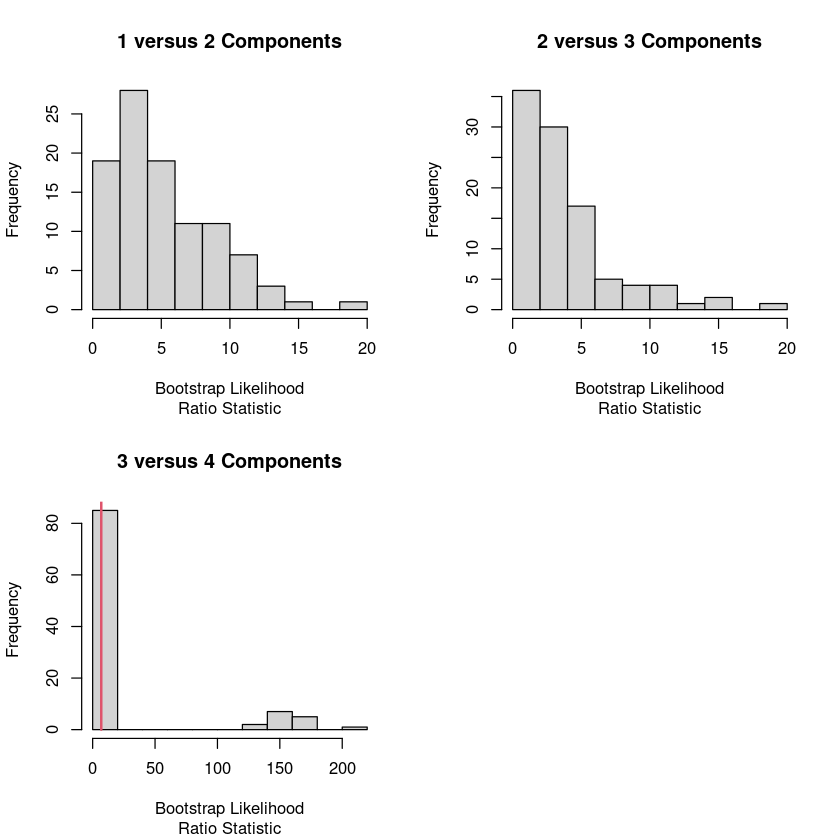

In [58]:
threeMix = read.csv("ThreeMix.csv")$x
boot.comp(threeMix, max.comp=3, mix.type = "normalmix")